In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('Movie_Review.csv')

In [3]:
data.dropna(inplace=True)

In [9]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [10]:
data['text'] = data['text'].apply(clean_review)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\saura/nltk_data'
    - 'C:\\Users\\saura\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'C:\\Users\\saura\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'C:\\Users\\saura\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\saura\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
#wordcloud 

from wordcloud import WordCloud

In [ ]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [23]:
reviews = cv.fit_transform(data['text']).toarray()

In [24]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [25]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [30]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [31]:
predict = model.predict(reviews_test)

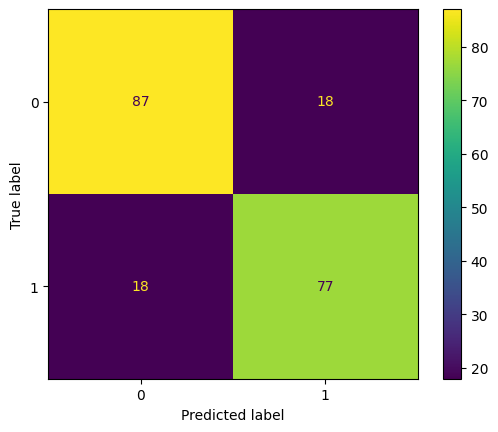

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [34]:
import pickle as pk

In [35]:
pk.dump(model,open('model.pkl','wb'))

In [37]:
pk.dump(cv,open('scaler.pkl','wb'))